In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
merged_df = pd.read_csv("../dataset/merged_retail_dataset.csv")
merged_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
 16  Year          421570 non-null  int64  
 17  Month         421570 non-null  int64  
 18  Week

In [12]:
# convert date to date-time format.
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Date'].dtype

dtype('<M8[ns]')

### set style for graphs

In [4]:
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

### Sales Trend over Time

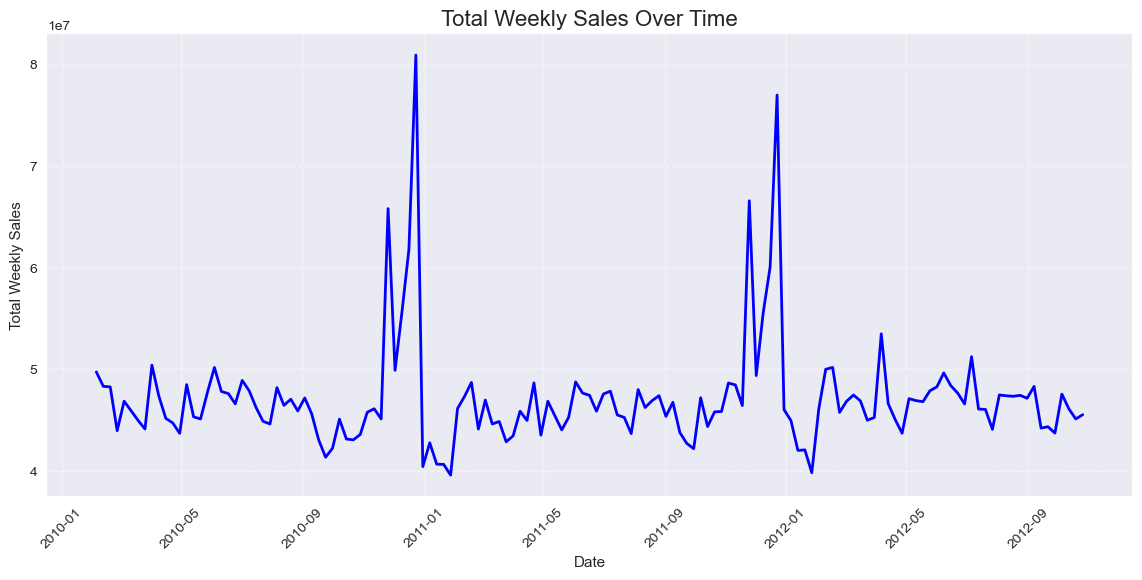

In [13]:
# Aggregate weekly sales across all stores
sales_trend = merged_df.groupby("Date")["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(14,6))
plt.plot(sales_trend["Date"], sales_trend["Weekly_Sales"], color="blue", linewidth=2)
plt.title("Total Weekly Sales Over Time", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

### Insights from Graph
#### Line Graph reveals  overall sales trends and seasonality across the dataset.
- Clear seasonal spikes around early 2011 and 2012, likely due to holidays or promotions.
- Sales fluctuate but generally stay within the 40–80 million range.
- Useful for identifying peak periods and planning inventory or marketing strategies.


### Average Weekly Sales by Year-Month

In [14]:
merged_df["YearMonth"] = merged_df["Date"].dt.to_period("M")
monthly_sales = merged_df.groupby("YearMonth")["Weekly_Sales"].sum().reset_index()
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

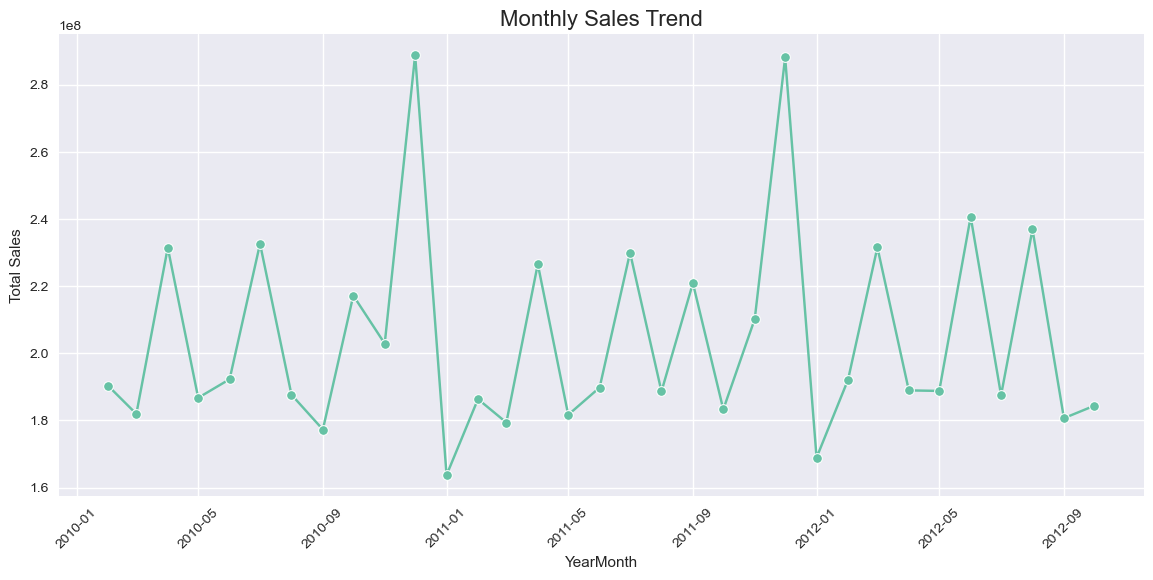

In [15]:
plt.figure(figsize=(14,6))
sns.lineplot(x="YearMonth", y="Weekly_Sales", data=monthly_sales, marker="o")
plt.title("Monthly Sales Trend", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.show()

### Insights from Graph
#### Line Graph analyze monthly sales patterns and detect recurring trends.
- Peaks in November 2010 and December 2011 suggest strong holiday season performance.
- Monthly granularity helps in understanding medium-term cycles and planning campaigns.



### Store type vs. average sales

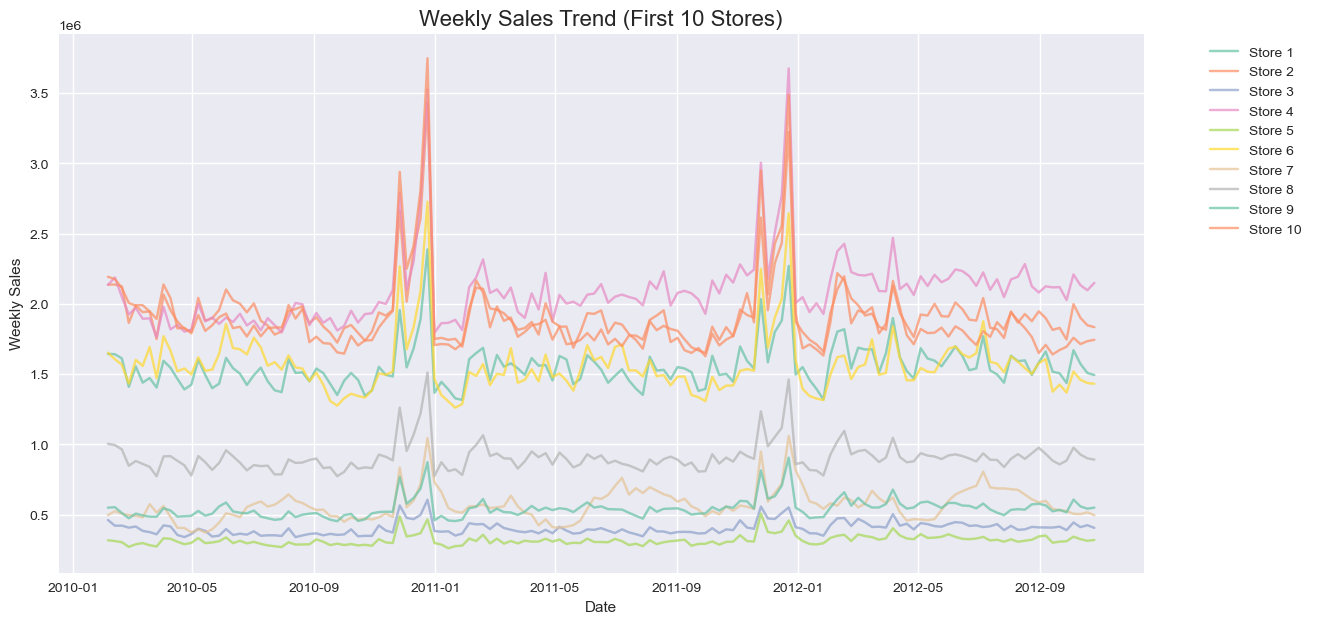

In [16]:
store_sales = merged_df.groupby(["Date","Store"])["Weekly_Sales"].sum().reset_index()
plt.figure(figsize=(14,7))
for store_id in merged_df["Store"].unique()[:10]:  # first 10 stores for clarity
    subset = store_sales[store_sales["Store"] == store_id]
    plt.plot(subset["Date"], subset["Weekly_Sales"], label=f"Store {store_id}", alpha=0.7)

plt.title("Weekly Sales Trend (First 10 Stores)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights from Graph
#### Multi-Line Graph compare weekly sales performance across multiple stores.
- Store 1 and Store 2 show consistently higher sales, indicating top performers.
- Seasonal spikes are synchronized across stores, reinforcing the impact of external events.
- Helps in benchmarking and identifying stores with growth potential.


### Holiday vs. Non-Holiday sales

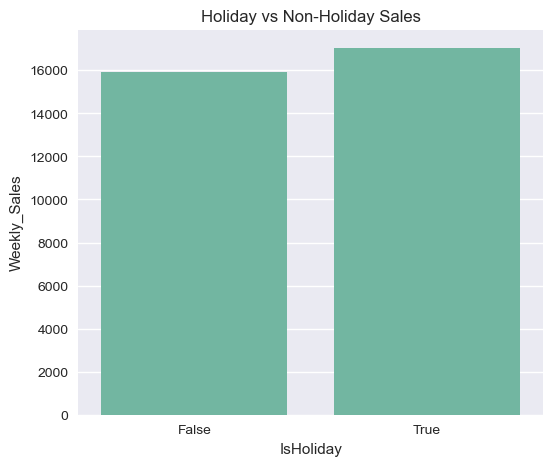

In [17]:
holiday_sales = merged_df.groupby("IsHoliday")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="IsHoliday", y="Weekly_Sales", data=holiday_sales)
plt.title("Holiday vs Non-Holiday Sales")
plt.show()

### Insights from Graph
#### Bar Chart compare average weekly sales during holiday vs non-holiday weeks.
- Holiday weeks show slightly higher sales, confirming their positive impact.
- Useful for validating the importance of holiday promotions and staffing decisions.

C:\Users\uttam\AppData\Local\Temp\ipykernel_18528\2263321094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=merged_df, palette="Set2")


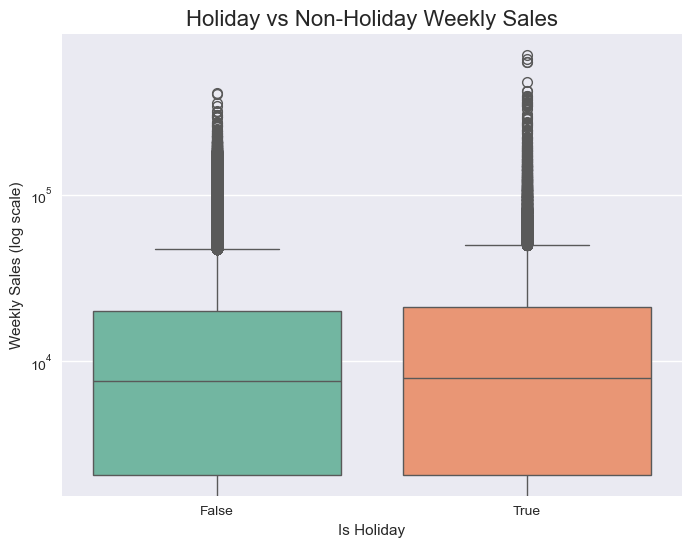

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x="IsHoliday", y="Weekly_Sales", data=merged_df, palette="Set2")
plt.yscale("log")  # sales distribution is skewed, log scale gives clearer view
plt.title("Holiday vs Non-Holiday Weekly Sales", fontsize=16)
plt.xlabel("Is Holiday")
plt.ylabel("Weekly Sales (log scale)")
plt.show()

### Insights from Graph
#### Box Plot examine the distribution and variability of sales during holiday vs non-holiday weeks.
- Holiday weeks have a wider spread and higher median, indicating more variability and potential for spikes.
- Outliers suggest occasional extreme sales events during holidays.

### Impact of MarkDown Promotions

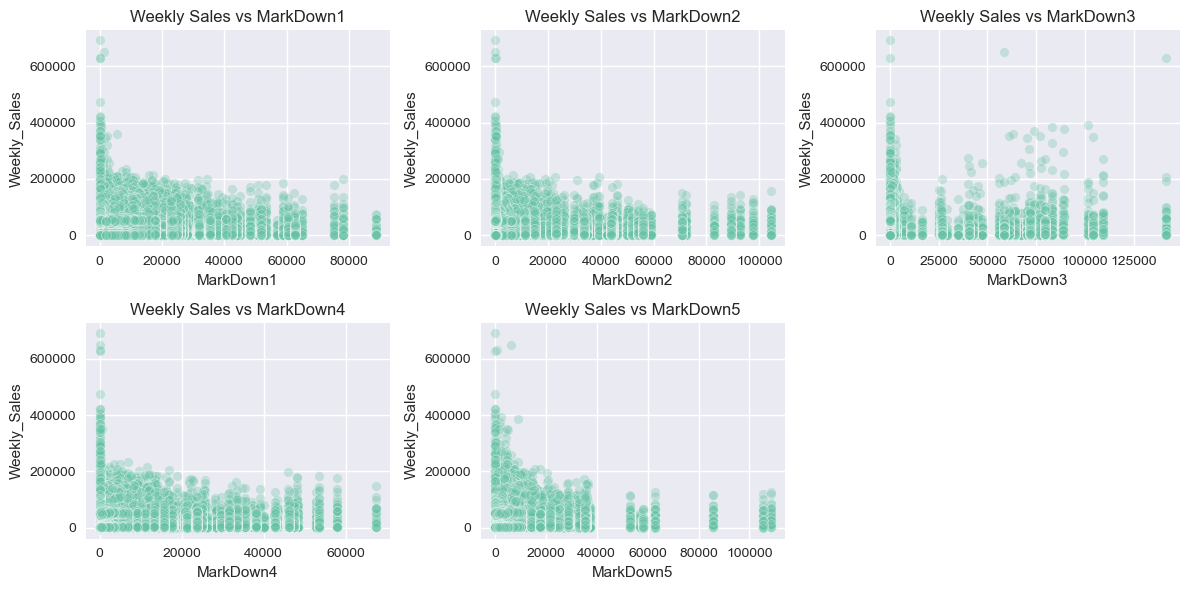

In [19]:
plt.figure(figsize=(12,6))
for i, col in enumerate(["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"], 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=merged_df[col], y=merged_df["Weekly_Sales"], alpha=0.3)
    plt.title(f"Weekly Sales vs {col}")
plt.tight_layout()
plt.show()

### Insights from Graph
#### Grid of Scatter Plots explore relationships between different markdown strategies and weekly sales.
- MarkDown1 and MarkDown4 show more visible spread, hinting at stronger influence.
- Most markdowns have weak or scattered correlation, suggesting limited direct impact.

### Correlation heatmap

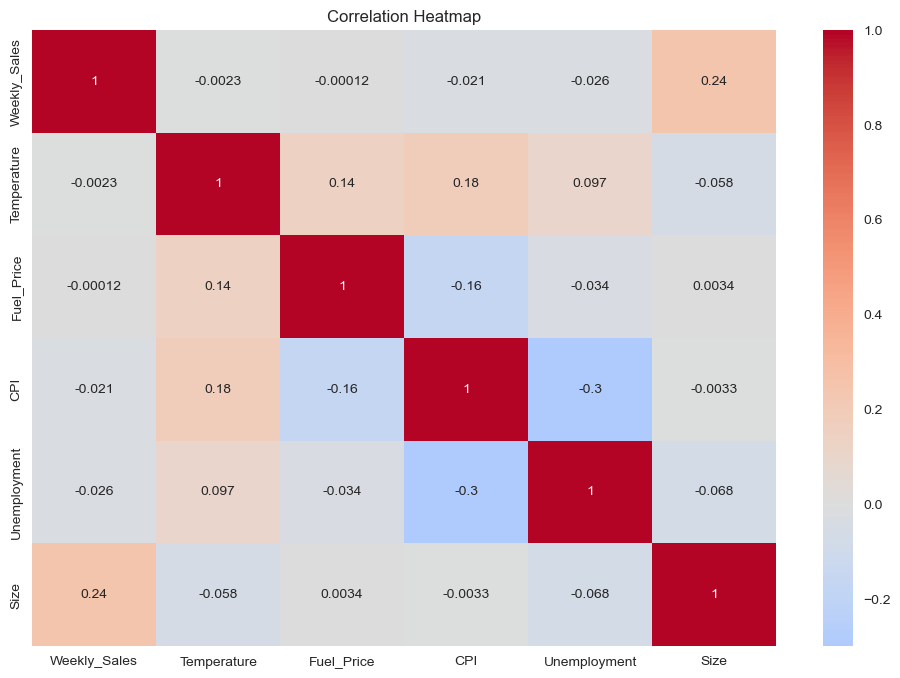

In [20]:
plt.figure(figsize=(12,8))
corr = merged_df[["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment","Size"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

### Insights from Graph
#### HeatMap identify linear relationships between sales and economic indicators.
- Weekly_Sales has a moderate positive correlation with Size (0.24), suggesting larger stores tend to generate more sales.
- CPI and Unemployment show a moderate negative correlation (-0.30), indicating economic tension.
- Temperature and Weekly_Sales have a near-zero correlation (-0.0023), implying temperature has minimal direct impact on sales.
- This heatmap helps in feature selection and understanding which variables might influence sales behavior


### Department-Level Contribution

C:\Users\uttam\AppData\Local\Temp\ipykernel_18528\3410074846.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="viridis")


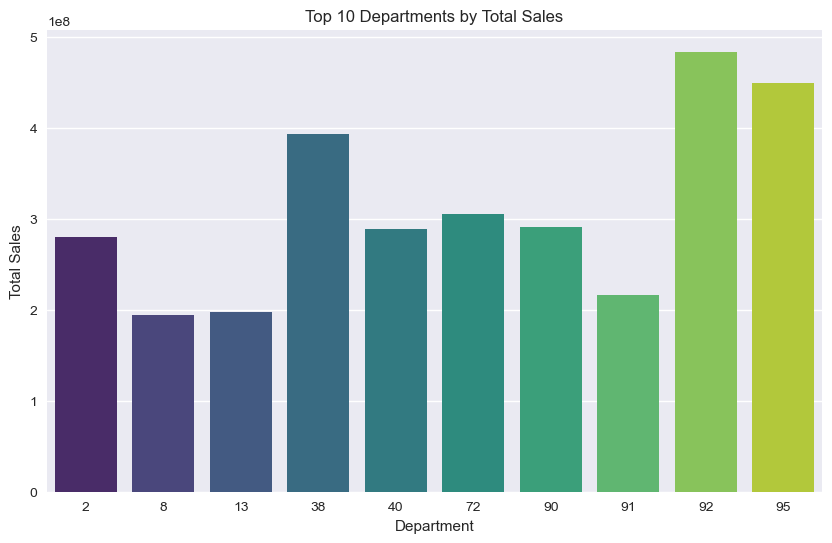

In [21]:
dept_sales = merged_df.groupby("Dept")["Weekly_Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="viridis")
plt.title("Top 10 Departments by Total Sales")
plt.ylabel("Total Sales")
plt.xlabel("Department")
plt.show()

### Insights from Graph
#### Bar Chart identify departments contributing most to overall sales.
- Department 92 and 95 are top performers.
- Helps in prioritizing inventory, promotions, and resource allocation

### Which stores generate the most sales overall?

C:\Users\uttam\AppData\Local\Temp\ipykernel_18528\967991284.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


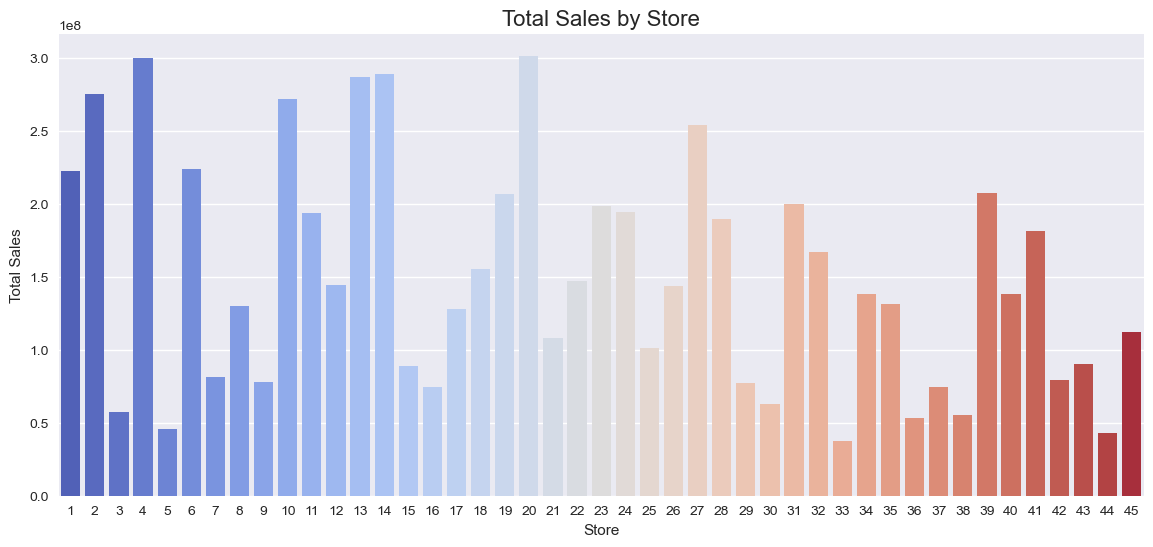

In [22]:
# Total sales by Store
store_sales = merged_df.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(
    x=store_sales.index,
    y=store_sales.values,
    palette="coolwarm"
)
plt.title("Total Sales by Store", fontsize=16)
plt.ylabel("Total Sales")
plt.xlabel("Store")
plt.show()


### Insights from Graph
#### Bar Chart compare cumulative sales performance across all 45 stores.
- Store-wise comparison reveals significant variation in total sales.
- Stores like 4, 20, 13, 14 are top performers, while others like 33 and 5 show lower totals.
- The gradient color scheme may suggest regional or performance-based grouping.
- This visualization is valuable for identifying high-impact stores and targeting underperforming ones for improvement.


### Does store size impact sales?

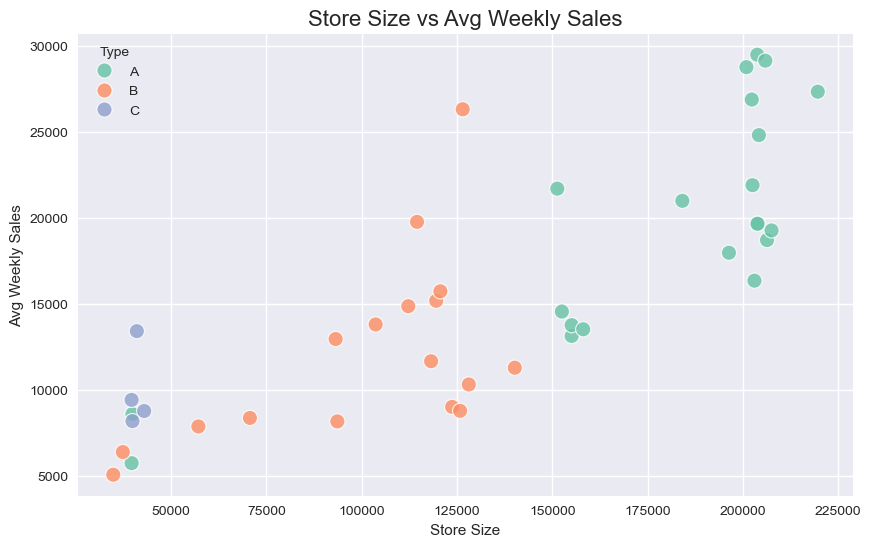

In [23]:
# Average sales by Store Type & Size
store_size_sales = merged_df.groupby(["Type", "Size"])["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Size",
    y="Weekly_Sales",
    hue="Type",
    data=store_size_sales,
    palette="Set2",
    s=120,
    alpha=0.8
)
plt.title("Store Size vs Avg Weekly Sales", fontsize=16)
plt.xlabel("Store Size")
plt.ylabel("Avg Weekly Sales")
plt.show()


### Insights from Graph
#### Scatter Plot compare performance across store types (A, B, C).
- Type A stores outperform others significantly.
- Indicates potential for scaling or replicating Type A strategies.


### Distribution Analysis

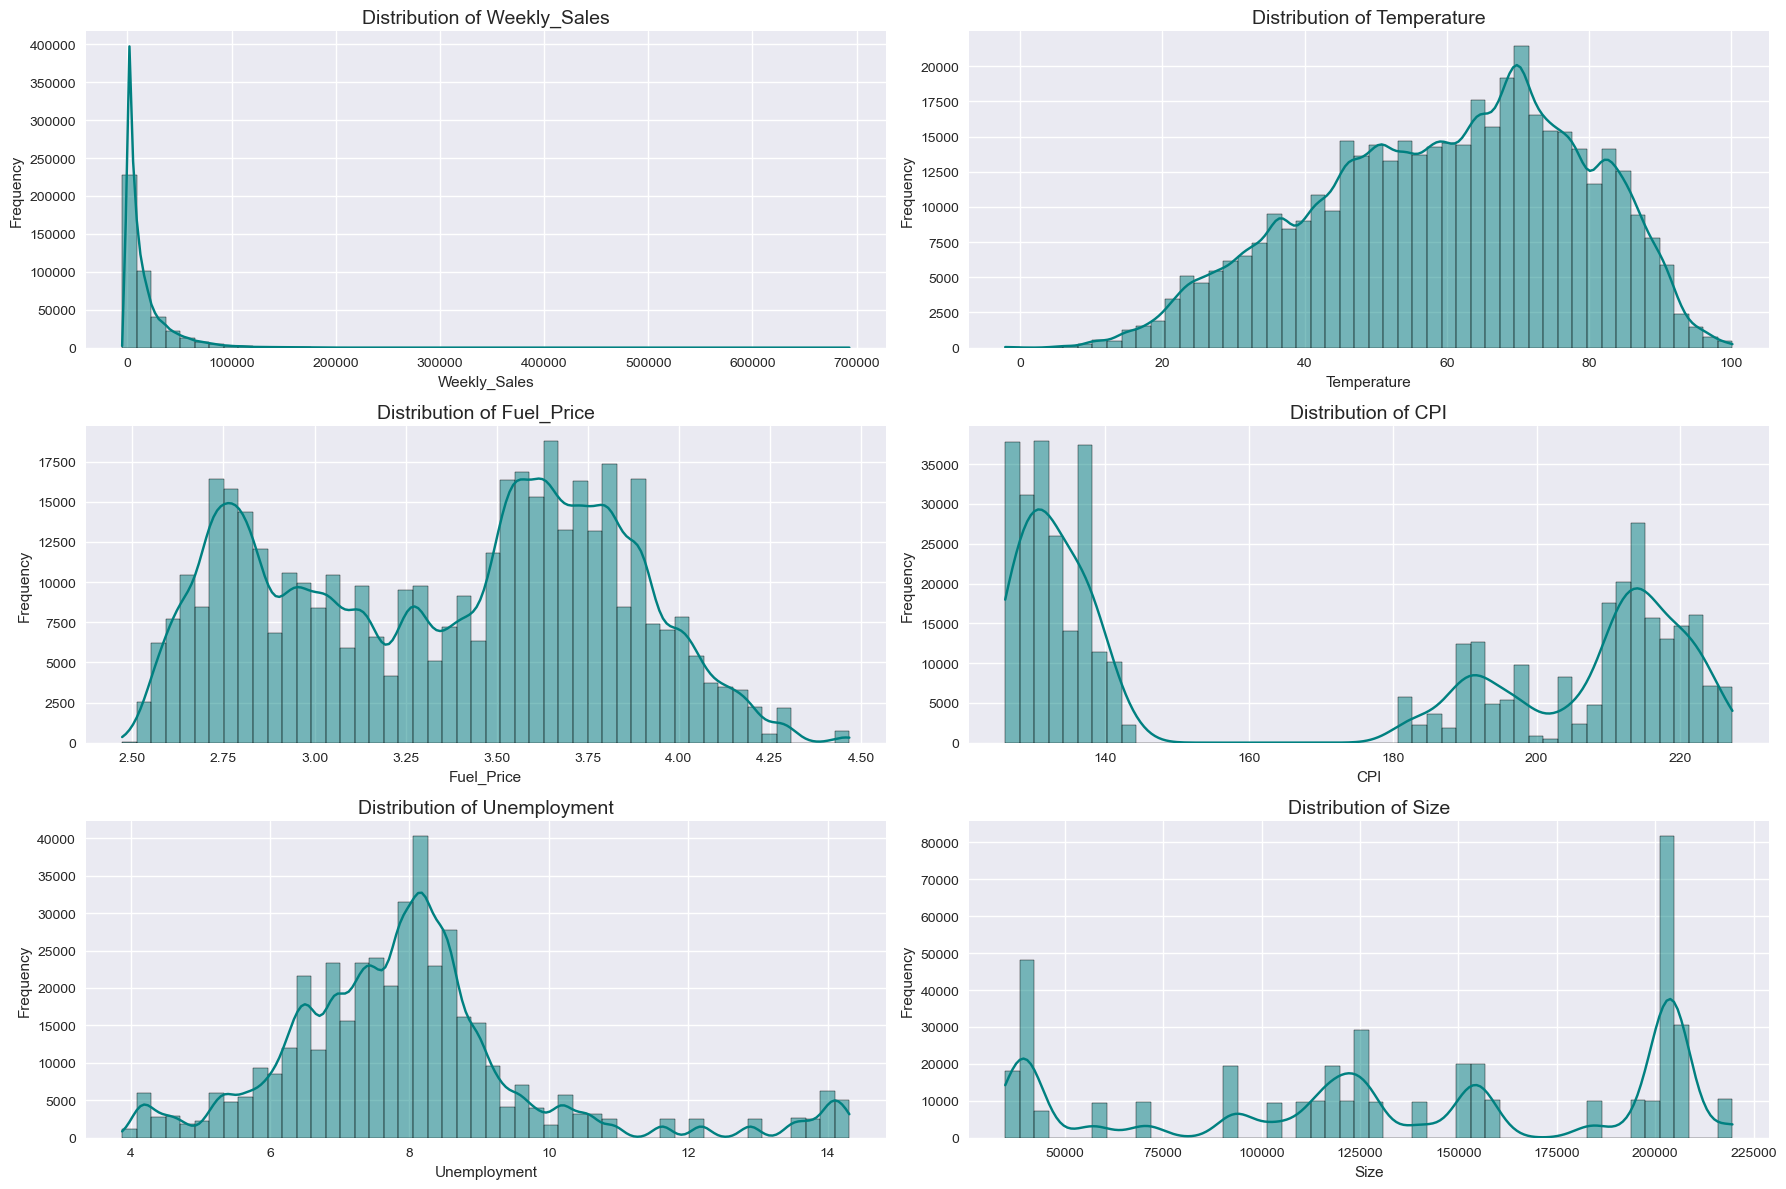

In [24]:
# Select numeric columns for distribution analysis
num_cols = ["Weekly_Sales", "Temperature", "Fuel_Price", "CPI", "Unemployment", "Size"]

plt.figure(figsize=(18, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(merged_df[col], bins=50, kde=True, color="teal")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Insights from Graph
#### Grid of Histogrmas analyze the distribution and spread of core variables in the dataset, which helps in identifying skewness, modality, and potential outliers.
- Weekly_Sales: Right-skewed distribution with a long tail, indicating most sales are concentrated at lower values but with occasional high spikes.
- Temperature: Roughly normal distribution centered around 60–70°F, suggesting consistent climate across stores.
- Fuel_Price: Multimodal, reflecting fluctuations in fuel costs over time.
- CPI: Bimodal distribution hints at two distinct economic periods or regions.
- Unemployment: Multimodal, showing varied labor market conditions across the dataset.
- Size: Multimodal peaks suggest different store categories or formats (e.g., small, medium, large).



### Correlation Heatmap

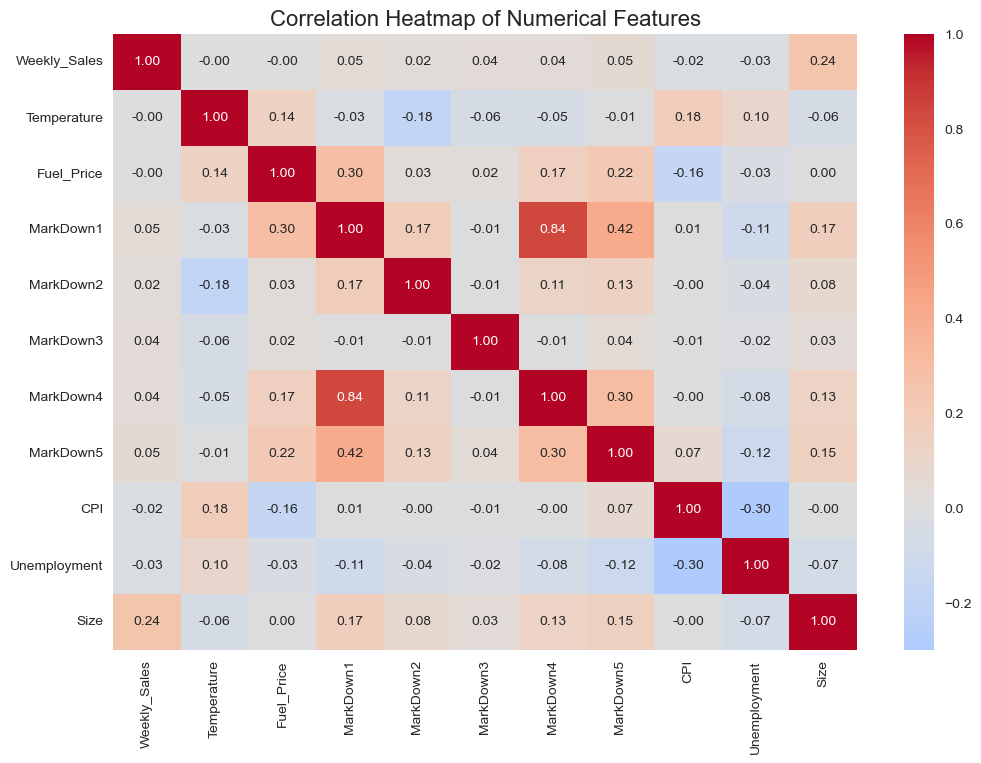

In [25]:
# Compute correlation matrix for numeric features
    corr_matrix = merged_df[["Weekly_Sales", "Temperature", "Fuel_Price", 
                             "MarkDown1", "MarkDown2", "MarkDown3", 
                             "MarkDown4", "MarkDown5", "CPI", 
                             "Unemployment", "Size"]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

### Insights from Graph
#### Correlation Heatmap  examine linear relationships between all numerical features, including markdowns, economic indicators, store attributes, and sales.
- Weekly_Sales shows weak positive correlations with Size and MarkDown1, suggesting larger stores and certain markdown strategies may slightly boost sales.
- MarkDown1 and MarkDown4 are strongly correlated, indicating they might be deployed together or represent similar discount strategies.
- CPI and Unemployment have a strong positive correlation, reflecting macroeconomic conditions.
- Most markdowns have low correlation with sales, implying their impact may be nonlinear or context-dependent.
- This heatmap is useful for feature selection, multicollinearity checks, and guiding model design.


### Store Type & Size Impact on Sales.

C:\Users\uttam\AppData\Local\Temp\ipykernel_18528\4250933191.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Type", y="Weekly_Sales", data=type_sales, palette="pastel")


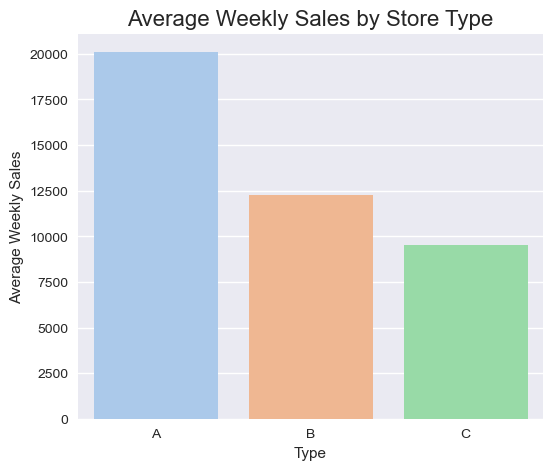

In [26]:
# Average sales by store type
type_sales = merged_df.groupby("Type")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(6,5))
sns.barplot(x="Type", y="Weekly_Sales", data=type_sales, palette="pastel")
plt.title("Average Weekly Sales by Store Type", fontsize=16)
plt.ylabel("Average Weekly Sales")
plt.show()

### Insights from Graph
#### Bar Chart compare performance across store types (A, B, C).
- Type A stores outperform others significantly.
- Indicates potential for scaling or replicating Type A strategies.

### Average sales by store size Category

C:\Users\uttam\AppData\Local\Temp\ipykernel_18528\729728336.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sales = merged_df.groupby("Size_Category")["Weekly_Sales"].mean().reset_index()
C:\Users\uttam\AppData\Local\Temp\ipykernel_18528\729728336.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Size_Category", y="Weekly_Sales", data=size_sales, palette="coolwarm")


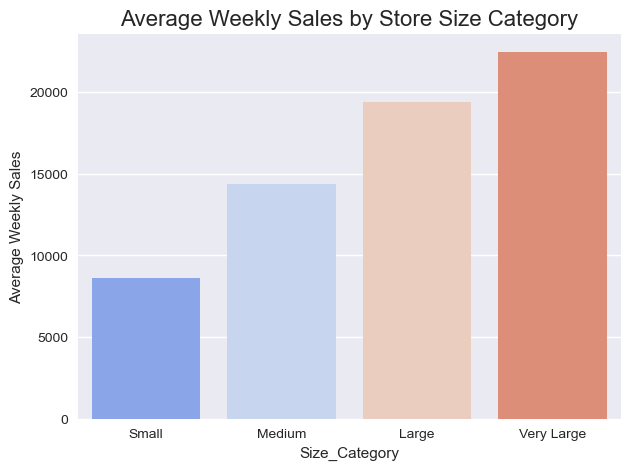

In [27]:
# Average sales by store size buckets
merged_df["Size_Category"] = pd.qcut(merged_df["Size"], q=4, labels=["Small","Medium","Large","Very Large"])

size_sales = merged_df.groupby("Size_Category")["Weekly_Sales"].mean().reset_index()

plt.figure(figsize=(7,5))
sns.barplot(x="Size_Category", y="Weekly_Sales", data=size_sales, palette="coolwarm")
plt.title("Average Weekly Sales by Store Size Category", fontsize=16)
plt.ylabel("Average Weekly Sales")
plt.show()

### Insights from Graph
#### Bar Chart analyze how store size affects weekly sales.
- Larger stores generate higher average sales.
- Confirms that physical size correlates with revenue potential


### Economic Factors vs Sales.

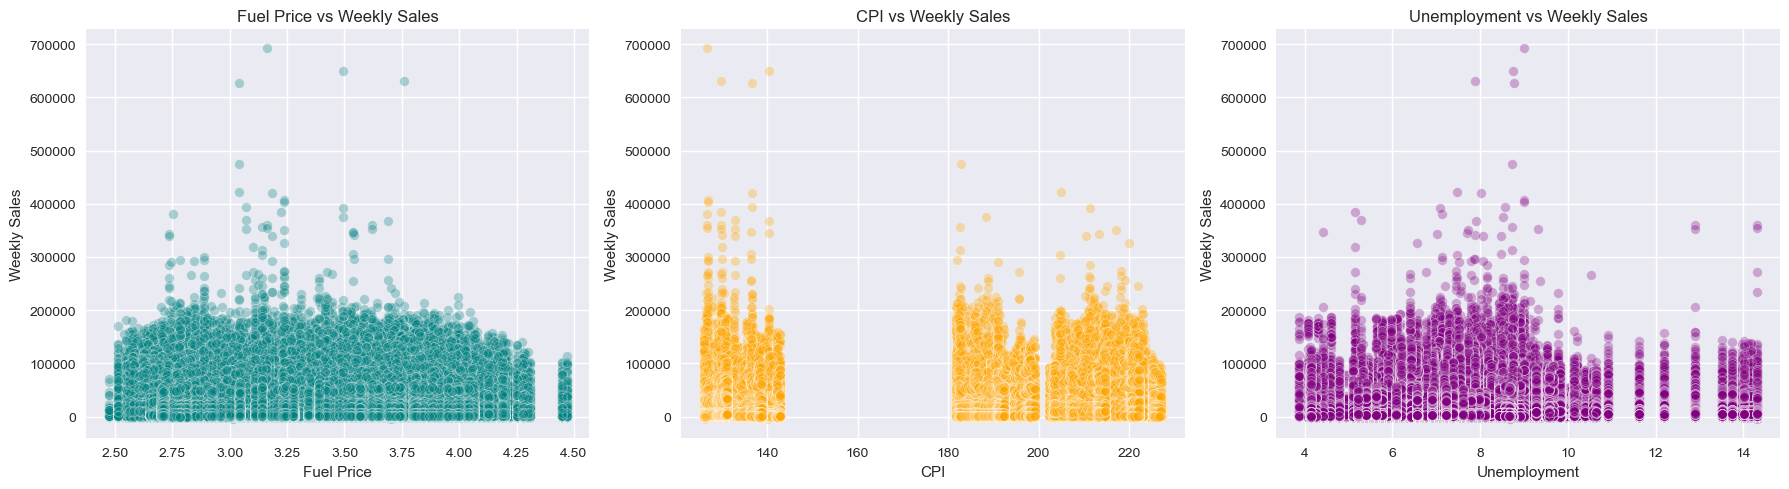

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Fuel Price vs Sales
sns.scatterplot(x="Fuel_Price", y="Weekly_Sales", data=merged_df, alpha=0.3, ax=axes[0], color="teal")
axes[0].set_title("Fuel Price vs Weekly Sales")
axes[0].set_ylabel("Weekly Sales")
axes[0].set_xlabel("Fuel Price")

# CPI vs Sales
sns.scatterplot(x="CPI", y="Weekly_Sales", data=merged_df, alpha=0.3, ax=axes[1], color="orange")
axes[1].set_title("CPI vs Weekly Sales")
axes[1].set_ylabel("Weekly Sales")
axes[1].set_xlabel("CPI")

# Unemployment vs Sales
sns.scatterplot(x="Unemployment", y="Weekly_Sales", data=merged_df, alpha=0.3, ax=axes[2], color="purple")
axes[2].set_title("Unemployment vs Weekly Sales")
axes[2].set_ylabel("Weekly Sales")
axes[2].set_xlabel("Unemployment")

plt.tight_layout()
plt.show()


### Insights from Graph
#### Scatter Plots visualize how fuel price, CPI, and unemployment affect sales.
- Fuel Price vs Weekly Sales: No clear linear trend; sales are spread across fuel price ranges, suggesting minimal direct impact.
- CPI vs Weekly Sales: Data points are widely scattered, indicating weak or no correlation between CPI and sales.
- Unemployment vs Weekly Sales: Similar dispersion, with no obvious pattern, implying unemployment rates may not directly influence weekly sales.
- These plots suggest that while economic factors are important contextually, their individual influence on weekly sales may be subtle or nonlinear


### Impact of MarkDowns (Promotions) on Weekly Sales

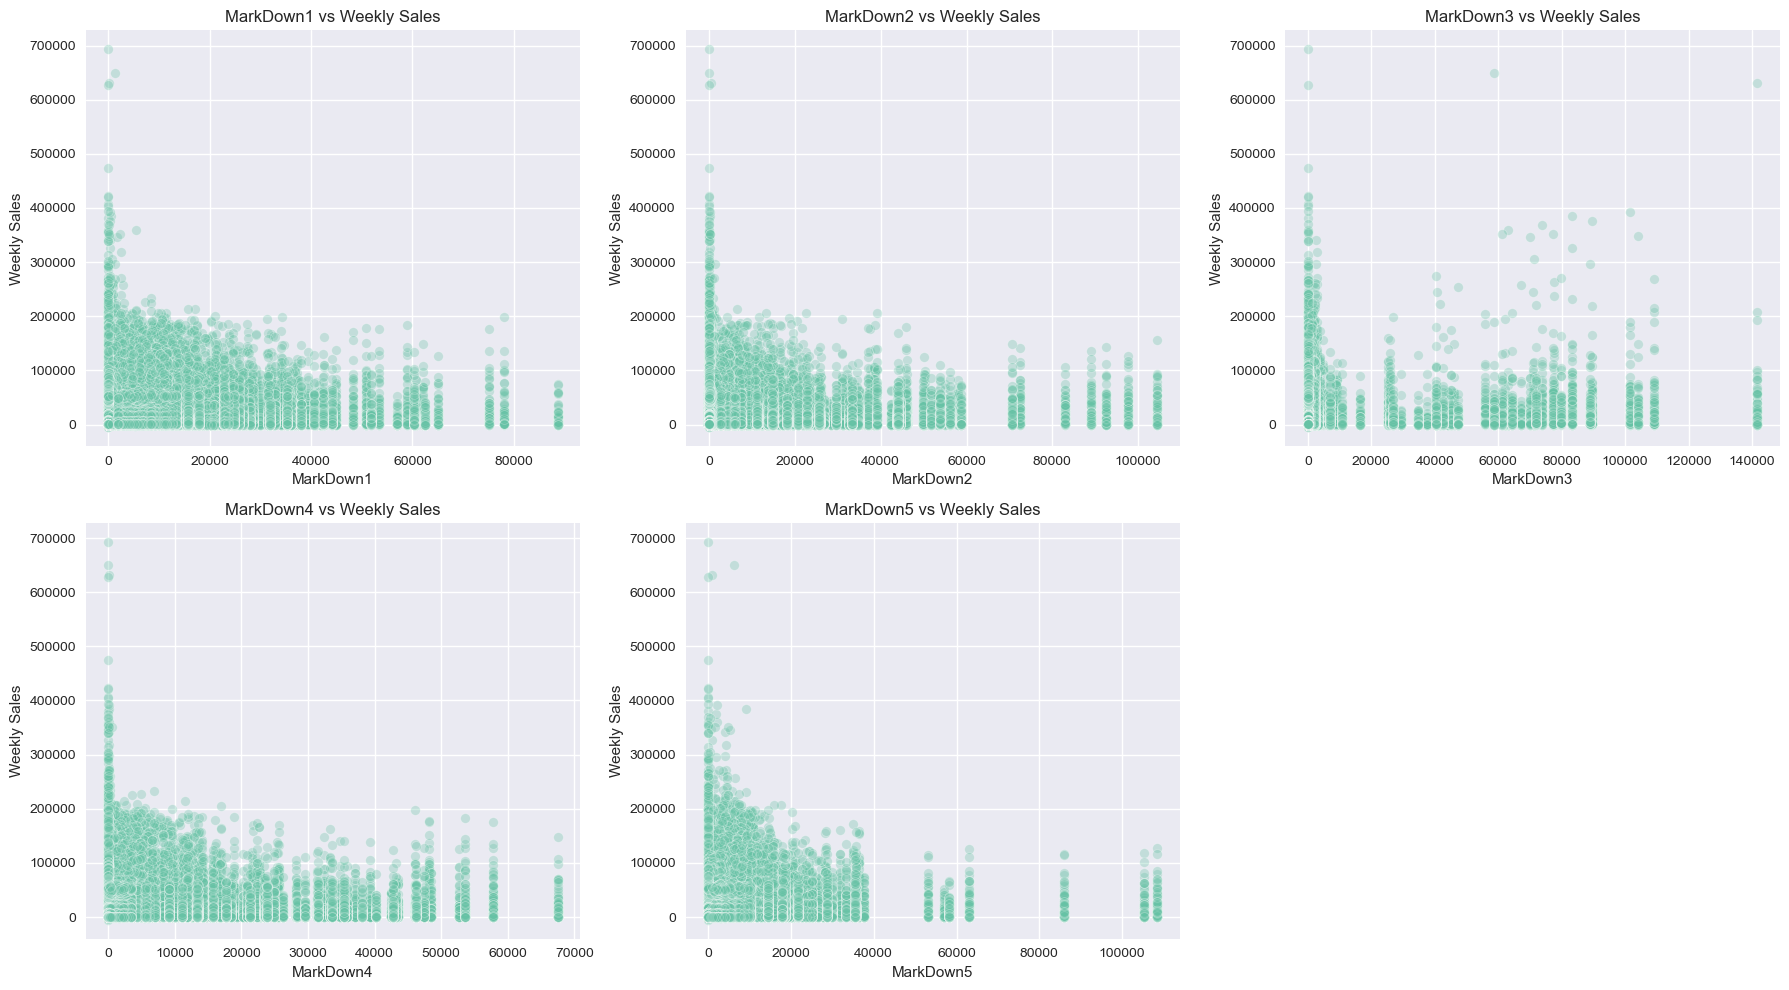

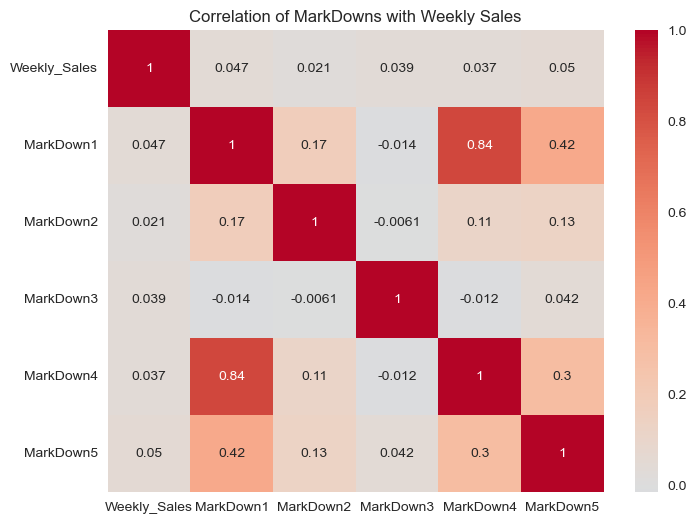

In [29]:
fig, axes = plt.subplots(2, 3, figsize=(18,10))

markdown_cols = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

for i, col in enumerate(markdown_cols):
    row, col_pos = divmod(i, 3)
    sns.scatterplot(x=col, y="Weekly_Sales", data=merged_df, alpha=0.3, ax=axes[row, col_pos])
    axes[row, col_pos].set_title(f"{col} vs Weekly Sales")
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel("Weekly Sales")

# Remove empty subplot
fig.delaxes(axes[1,2])  

plt.tight_layout()
plt.show()

# Correlation heatmap for MarkDowns & Weekly Sales
plt.figure(figsize=(8,6))
sns.heatmap(merged_df[["Weekly_Sales"] + markdown_cols].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of MarkDowns with Weekly Sales")
plt.show()


### Insights from Graph
#### Grid of Scatter Plots and Correlation Matrix shows how different types of markdowns (promotional discounts) relate to weekly sales performance.
- MarkDown1 and MarkDown4 show broader spread and denser clusters, suggesting they may have more influence on sales than others.
- MarkDown2, MarkDown3, and MarkDown5 exhibit weaker or noisier relationships, with most data points concentrated near lower values.
- Overall, the impact of markdowns on sales appears nonlinear and may depend on timing, store type, or product category.
- These plots are useful for identifying which markdown strategies are worth modeling or testing further.

### Seasonality & Time-Series Decomposition

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [31]:
# Ensure datetime
merged_df["Date"] = pd.to_datetime(merged_df["Date"])

# Aggregate by week across all stores & depts
weekly_sales = merged_df.resample("W", on="Date")["Weekly_Sales"].sum()

print(weekly_sales.head(10))
print("Total rows:", len(weekly_sales))
print("NaNs:", weekly_sales.isna().sum())

Date
2010-02-07    49750740.50
2010-02-14    48336677.63
2010-02-21    48276993.78
2010-02-28    43968571.13
2010-03-07    46871470.30
2010-03-14    45925396.51
2010-03-21    44988974.64
2010-03-28    44133961.05
2010-04-04    50423831.26
2010-04-11    47365290.44
Freq: W-SUN, Name: Weekly_Sales, dtype: float64
Total rows: 143
NaNs: 0


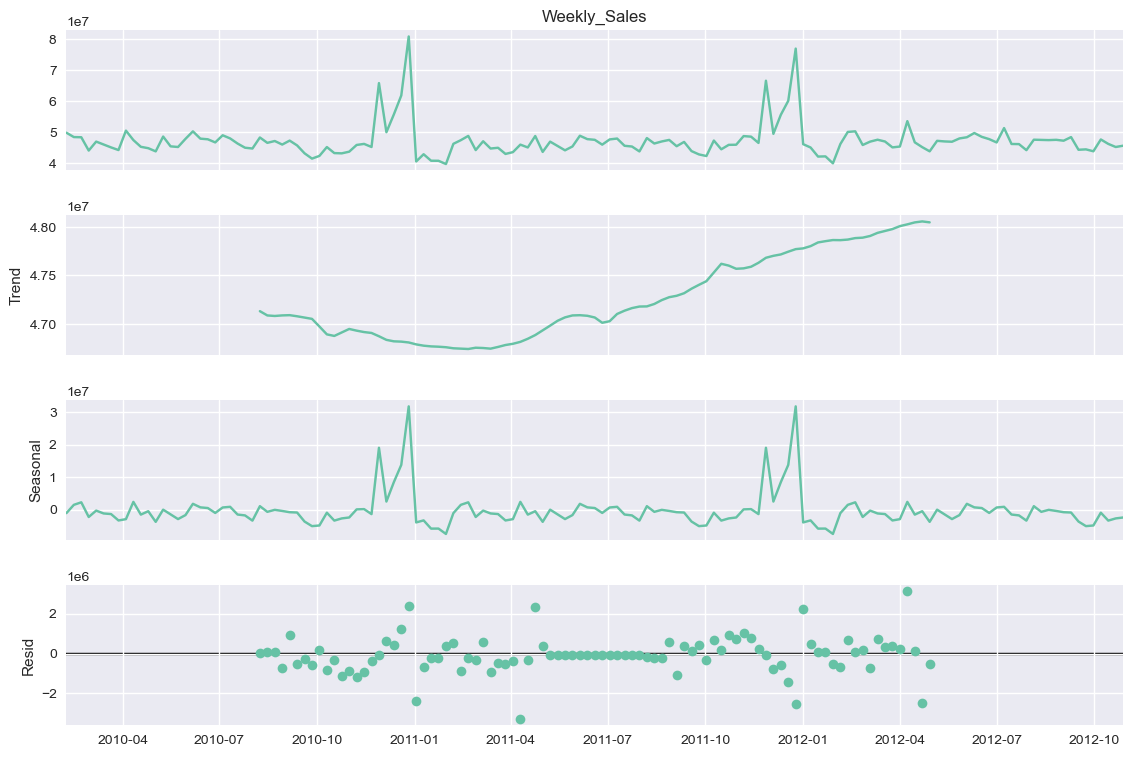

In [32]:
decomposition = seasonal_decompose(weekly_sales, model="additive", period=52)
fig = decomposition.plot()
fig.set_size_inches(12, 8)

### Insights from Graph
#### Time Series Decomposition Plots (Original, Trend, Seasonal, Residual) break down sales into trend, seasonal, and residual components.
- Clear seasonal pattern and upward trend from mid-2011 to mid-2012.
- Residuals show random noise, validating the decomposition.